<a href="https://colab.research.google.com/github/realdanielalexander/diamonds_bangkit/blob/master/Diamonds_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Bangkit MLCC Project - Diamonds Dataset</h1>
<ul>
  <li>Daniel Alexander</li>
  <li>Mardianto Karim</li>
  <li>Natasha Yulian</li>
</ul>
This code block is taken from the 'Programming Exercise' module on Machine Learning Crash Course.

<h1>Run this colab on tensorflow 2.x</h1>

In [0]:
#@title Run this Colab on TensorFlow 2.x
%tensorflow_version 2.x

<h1>Import relevant libraries</h1>

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

<h1>Load dataset</h1>

In [0]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['diamonds.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving diamonds.csv to diamonds.csv


In [0]:
df_raw = pd.read_csv('diamonds.csv')
df_raw['volume']=df_raw['x']*df_raw['y']*df_raw['z']
df_raw

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


<h1>Plot the correlation matrix</h1>

In [0]:
df_raw.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z,volume
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208,-0.367016
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.976308
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.009157
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.167400
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.902385
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.956564
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.975143
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.950065
volume,-0.367016,0.976308,0.009157,0.167400,0.902385,0.956564,0.975143,0.950065,1.000000


From this correlation matrix, we can see that the biggest correlating variables are carat and price. So we're going to choose carat as a feature and price as the label. We found that correlation between carat with price and volume (x,y,z) are the highest. First is Carat versus Price, second is Volume versus Price and the last one is cross between carat and volume versus Price. Then we will chose one of the best between the 3 models.


<h1>Examine the dataset</h1>

In [0]:
dfa = df_raw[['carat', 'price','volume']].copy()
dfa = dfa.loc[dfa['price']<=5000]
dfa.describe()

,carat,price,volume
count,39226.000000,39226.000000,39226.000000
mean,0.572899,1914.472289,93.437153
std,0.259138,1327.996299,41.937186
min,0.200000,326.000000,0.000000
25%,0.340000,801.000000,55.731600
50%,0.510000,1417.000000,83.786945
75%,0.730000,2826.000000,119.701560
max,1.740000,5000.000000,838.502400


## Modelling Carat Vs Price

## Define functions that build and train a model

This code block is taken from the 'Programming Exercise' module on Machine Learning Crash Course.


In [0]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


## Define plotting functions

This code block is taken from the 'Programming Exercise' module on Machine Learning Crash Course.

In [0]:
#@title Define the plotting function
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = train_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


<h1>Copy features and label to varable df</h1>

In [0]:
df = df_raw[['carat', 'price']].copy()
df = df.loc[df['price']<=5000]
df

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


Text(0, 0.5, 'Price')

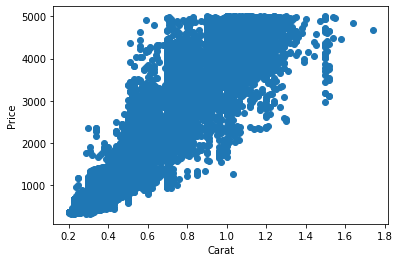

In [0]:
plt.scatter(df['carat'], df['price'])
plt.xlabel("Carat")
plt.ylabel("Price")

Based on the description table, there are some anomalies on the data. The maximum value for both the feature and the label are much greater than its quantiles. There must be outliers in this dataset.

<h1>Splitting into training and testing data</h1>

In [0]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)

In [0]:
train_df.shape

In [0]:
test_df.shape

<h1>Building the model and training it</h1>

On the first try, we started with a learning rate of .08 and 30 epochs, with a batch size of 100.

Epoch 1/30
252/252 [==============================] - 0s 1ms/step - loss: 5405241.0000 - root_mean_squared_error: 2327.2017 - val_loss: 5251143.0000 - val_root_mean_squared_error: 2291.9746
Epoch 2/30
252/252 [==============================] - 0s 1ms/step - loss: 5272728.0000 - root_mean_squared_error: 2298.5786 - val_loss: 5120995.0000 - val_root_mean_squared_error: 2263.3972
Epoch 3/30
252/252 [==============================] - 0s 1ms/step - loss: 5135527.5000 - root_mean_squared_error: 2269.9570 - val_loss: 4993014.0000 - val_root_mean_squared_error: 2234.9395
Epoch 4/30
252/252 [==============================] - 0s 1ms/step - loss: 5023141.5000 - root_mean_squared_error: 2241.5186 - val_loss: 4866562.5000 - val_root_mean_squared_error: 2206.4612
Epoch 5/30
252/252 [==============================] - 0s 1ms/step - loss: 4920647.5000 - root_mean_squared_error: 2213.0820 - val_loss: 4742220.0000 - val_root_mean_squared_error: 2178.0945
Epoch 6/30
252/252 [==============================

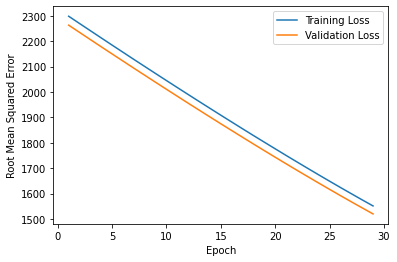

In [0]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.2

# Specify the feature and the label.
my_feature = "carat"  # carat value.
my_label="price" # the price value for that specific diamond.
# We're predicting diamond price based on carat value

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])


As we can see here, the model hasn't fully converged, so we tried to increase the learning rate and number of epochs to 0.5 and 50 respectively

Epoch 1/50
252/252 [==============================] - 0s 1ms/step - loss: 5052606.5000 - root_mean_squared_error: 2249.3914 - val_loss: 4574095.5000 - val_root_mean_squared_error: 2139.1418
Epoch 2/50
252/252 [==============================] - 0s 1ms/step - loss: 4296225.0000 - root_mean_squared_error: 2074.1838 - val_loss: 3865394.5000 - val_root_mean_squared_error: 1966.4769
Epoch 3/50
252/252 [==============================] - 0s 1ms/step - loss: 3615885.7500 - root_mean_squared_error: 1903.9655 - val_loss: 3237025.7500 - val_root_mean_squared_error: 1799.5748
Epoch 4/50
252/252 [==============================] - 0s 1ms/step - loss: 3034210.7500 - root_mean_squared_error: 1739.8745 - val_loss: 2686702.7500 - val_root_mean_squared_error: 1639.4991
Epoch 5/50
252/252 [==============================] - 0s 1ms/step - loss: 2505778.7500 - root_mean_squared_error: 1584.8214 - val_loss: 2218812.2500 - val_root_mean_squared_error: 1489.9276
Epoch 6/50
252/252 [==============================

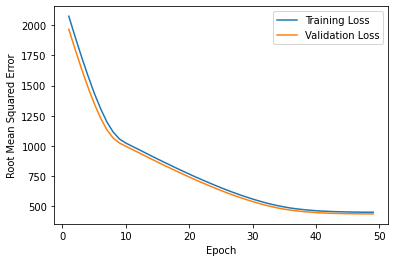

In [0]:
# The following variables are the hyperparameters.
learning_rate = 0.5
epochs = 50
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.2

# Specify the feature and the label.
my_feature = "carat"  # carat value.
my_label="price" # the price value for that specific diamond.
# We're predicting diamond price based on carat value

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])


As seen on the plot above, the model has converged on 50 epochs, as the plot has flattened out. But we tried to increase the number of epochs to 100 just to be sure.

Epoch 1/100
252/252 [==============================] - 0s 1ms/step - loss: 5045860.5000 - root_mean_squared_error: 2249.1501 - val_loss: 4574244.0000 - val_root_mean_squared_error: 2139.1765
Epoch 2/100
252/252 [==============================] - 0s 1ms/step - loss: 4310667.5000 - root_mean_squared_error: 2074.3655 - val_loss: 3863898.7500 - val_root_mean_squared_error: 1966.0962
Epoch 3/100
252/252 [==============================] - 0s 1ms/step - loss: 3617990.5000 - root_mean_squared_error: 1903.7081 - val_loss: 3236567.0000 - val_root_mean_squared_error: 1799.4478
Epoch 4/100
252/252 [==============================] - 0s 1ms/step - loss: 3030602.0000 - root_mean_squared_error: 1740.0369 - val_loss: 2685721.2500 - val_root_mean_squared_error: 1639.2000
Epoch 5/100
252/252 [==============================] - 0s 1ms/step - loss: 2508074.7500 - root_mean_squared_error: 1583.9984 - val_loss: 2217070.0000 - val_root_mean_squared_error: 1489.3428
Epoch 6/100
252/252 [========================

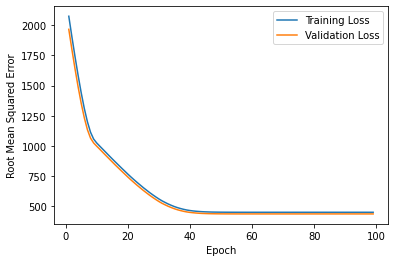

In [0]:
# The following variables are the hyperparameters.
learning_rate = 0.5
epochs = 100
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.2

# Specify the feature and the label.
my_feature = "carat"  # carat value.
my_label="price" # the price value for that specific diamond.
# We're predicting diamond price based on carat value

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])


100 epochs is too large, so we decided with 50 epochs as executed in the training run.<br>
learning_rate = 0.5<br>
epochs = 50<br>
batch_size = 100<br>

In [0]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = train_df.sample(n=10000)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 1
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the create_model and traing_model functions.
Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/50
314/314 [==============================] - 0s 952us/step - loss: 4944849.5000 - root_mean_squared_error: 2223.5459
Epoch 2/50
314/314 [==============================] - 0s 996us/step - loss: 4028224.5000 - root_mean_squared_error: 2007.1060
Epoch 3/50
314/314 [==============================] - 0s 954us/step - loss: 3232245.5000 - root_mean_squared_error: 1797.9323
Epoch 4/50
314/314 [==============================] - 0s 982us/step - loss: 2564755.2500 - root_mean_squared_error: 1601.6091
Epoch 5/50
314/314 [==============================] - 0s 964us/step - loss: 2017792.2500 - root_mean_squared_error: 1420.5620
Epoch 6/50
314/314 [==============================] - 0s 936us/step - loss: 1599775.8750 - root_mean_squared_error: 1264.9080
Epoch 7/50
314/314 [==============================] - 0s 944us/step - loss: 1302260.2500 - root_mean_squared_error: 1141.1462
Epoch 8/50
314/314 [==============================] - 0s 941us/step - loss: 1125806.1250 - root_mean_squared_error: 10

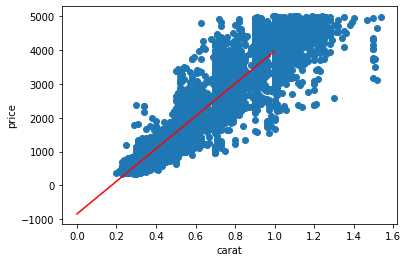

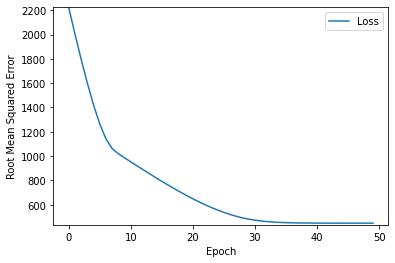

In [0]:
# The following variables are the hyperparameters.
learning_rate = 0.5
epochs = 50
batch_size = 100

# Specify the feature and the label.
my_feature = "carat"  # carat value.
my_label="price" # the price value for that specific diamond.
# We're predicting diamond price based on carat value

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, train_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

With only carat value we did not reach minimum loss, although this model has converged. This could be caused by the large size of data and large variability that makes it difficult for the model to learn from. Besides, we also need to take into account the volume of the diamond, so that's what we're going to do next.

## Modelling Volume(x*y*z) Vs Price

In [0]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = train_df.sample(n=10000)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 100
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the create_model and traing_model functions.
Defined the plot_the_model and plot_the_loss_curve functions.


In [0]:
#@title Load the imports

# from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")

Imported the modules.


In [0]:
df = df_raw[['price', 'volume']].copy()
df = df.loc[df['price']<=5000]
df['price'] = df['price']/100
df

,price,volume
0,3.3,38.2
1,3.3,34.5
2,3.3,38.1
3,3.3,46.7
4,3.4,51.9
...,...,...
53935,27.6,115.9
53936,27.6,118.1
53937,27.6,114.4
53938,27.6,140.8


In [0]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)

Epoch 1/10
314/314 [==============================] - 0s 937us/step - loss: 75.2427 - root_mean_squared_error: 8.6762
Epoch 2/10
314/314 [==============================] - 0s 998us/step - loss: 28.7087 - root_mean_squared_error: 5.3582
Epoch 3/10
314/314 [==============================] - 0s 953us/step - loss: 28.0157 - root_mean_squared_error: 5.2935
Epoch 4/10
314/314 [==============================] - 0s 980us/step - loss: 28.3361 - root_mean_squared_error: 5.3239
Epoch 5/10
314/314 [==============================] - 0s 951us/step - loss: 28.0861 - root_mean_squared_error: 5.3005
Epoch 6/10
314/314 [==============================] - 0s 935us/step - loss: 27.9255 - root_mean_squared_error: 5.2849
Epoch 7/10
314/314 [==============================] - 0s 948us/step - loss: 28.4520 - root_mean_squared_error: 5.3345
Epoch 8/10
314/314 [==============================] - 0s 958us/step - loss: 28.3217 - root_mean_squared_error: 5.3225
Epoch 9/10
314/314 [==============================] - 0s

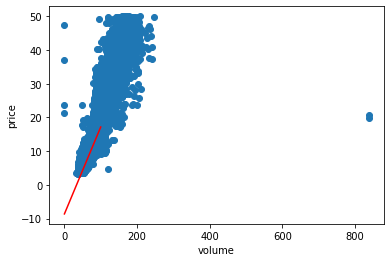

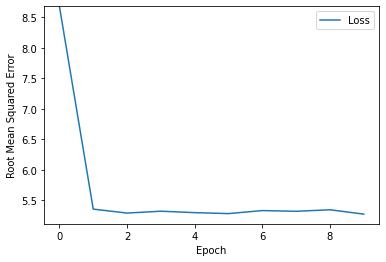

In [0]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 10
batch_size = 100

# Specify the feature and the label.
my_feature = "volume"  # carat value.
my_label="price" # the price value for that specific diamond.
# We're predicting diamond price based on carat value

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, train_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Modelling Cross Feature (Carat and Volume) Vs Price

In [0]:
#@title Define functions to create and train a model, and a plotting function
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


In [0]:
#@title Load the imports

# from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")

Imported the modules.


In [0]:
df = df_raw[['carat', 'price', 'x', 'y', 'z']].copy()
df = df.loc[df['price']<=5000]
df['price'] = df['price']/100
df

,carat,price,x,y,z
0,0.2,3.3,4.0,4.0,2.4
1,0.2,3.3,3.9,3.8,2.3
2,0.2,3.3,4.0,4.1,2.3
3,0.3,3.3,4.2,4.2,2.6
4,0.3,3.4,4.3,4.3,2.8
...,...,...,...,...,...
53935,0.7,27.6,5.8,5.8,3.5
53936,0.7,27.6,5.7,5.8,3.6
53937,0.7,27.6,5.7,5.7,3.6
53938,0.9,27.6,6.2,6.1,3.7


In [0]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)

In [0]:
resolution_in_degrees = 1.0 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for x.
x_as_a_numeric_column = tf.feature_column.numeric_column("x")
x_boundaries = list(np.arange(int(min(train_df['x'])), int(max(train_df['x'])), resolution_in_degrees))
x = tf.feature_column.bucketized_column(x_as_a_numeric_column, x_boundaries)

# Create a bucket feature column for y.
y_as_a_numeric_column = tf.feature_column.numeric_column("y")
y_boundaries = list(np.arange(int(min(train_df['y'])), int(max(train_df['y'])), resolution_in_degrees))
y = tf.feature_column.bucketized_column(y_as_a_numeric_column, y_boundaries)

# Create a bucket feature column for z.
z_as_a_numeric_column = tf.feature_column.numeric_column("z")
z_boundaries = list(np.arange(int(min(train_df['z'])), int(max(train_df['z'])), resolution_in_degrees))
z = tf.feature_column.bucketized_column(z_as_a_numeric_column, z_boundaries)

# Create a bucket feature column for carat.
carat_as_a_numeric_column = tf.feature_column.numeric_column("carat")
carat_boundaries = list(np.arange(int(min(train_df['carat'])), int(max(train_df['carat'])), resolution_in_degrees))
carat = tf.feature_column.bucketized_column(carat_as_a_numeric_column, carat_boundaries)

# Create a feature cross of latitude and longitude.
x_y_z_carat = tf.feature_column.crossed_column([x, y, z, carat], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(x_y_z_carat)
feature_columns.append(crossed_feature)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)
feature_cross_feature_layer

Epoch 1/10
314/314 [==============================] - 0s 1ms/step - loss: 244.5395 - root_mean_squared_error: 15.6405
Epoch 2/10
314/314 [==============================] - 0s 1ms/step - loss: 51.4049 - root_mean_squared_error: 7.1697
Epoch 3/10
314/314 [==============================] - 0s 1ms/step - loss: 38.6510 - root_mean_squared_error: 6.2166
Epoch 4/10
314/314 [==============================] - 0s 1ms/step - loss: 38.3055 - root_mean_squared_error: 6.1890
Epoch 5/10
314/314 [==============================] - 0s 1ms/step - loss: 38.1606 - root_mean_squared_error: 6.1772
Epoch 6/10
314/314 [==============================] - 0s 1ms/step - loss: 38.0837 - root_mean_squared_error: 6.1713
Epoch 7/10
314/314 [==============================] - 0s 1ms/step - loss: 38.0468 - root_mean_squared_error: 6.1688
Epoch 8/10
314/314 [==============================] - 0s 1ms/step - loss: 38.0470 - root_mean_squared_error: 6.1675
Epoch 9/10
314/314 [==============================] - 0s 1ms/step - lo

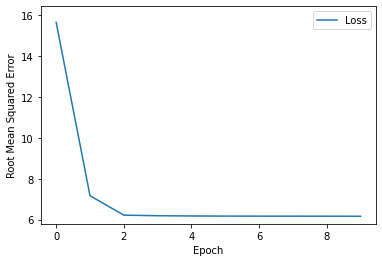


: Evaluate the new model against the test set:

The learned weight for your model is 0.2576
The learned bias for your model is -8.5994

79/79 [==============================] - 0s 1ms/step - loss: 35.8933 - root_mean_squared_error: 5.9963


[35.89326477050781, 5.9962615966796875]

In [0]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 10
batch_size = 100
label_name = "price"


# Build the model, this time passing in the feature_cross_feature_layer: 
my_model = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)



<h1>Conclusion</h1>

There are two features that have a same high correlate to diamond price, they are carat and volume(xyz). We make 3 models, they are:


*   Carat Vs Price (loss: 199733.0156- root_mean_squared_error: 446.9641)
*   Volume Vs Price (loss: 27.8366 - root_mean_squared_error: 5.2762)
*   Cross feature (Carat and Volume) vs Price (loss: 35.8933 - root_mean_squared_error: 5.9963))

The best simple linear regression model is the model of Volume Vs Price, because have the smallest Loss and RMSE.
The Simple Linear Regression Model of Volume Vs Price is

*  Price=(-8.5994)+0.2576(Volume)


